In [1]:
import matplotlib.pyplot as matplot
import seaborn as sb
import pandas as pd
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
# from utils import loadDataset

In [4]:
# importing the dataset
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
    
# deleting the columns with unique values and rescaling
X = X[:, ~np.all(X[1:] == X[:-1], axis=0)]
X = X/255
    
# splitting the data into train, validation and test
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid , y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size = 0.25, random_state=0)

print('--TRAIN SET --', X_train.shape, y_train.shape)
print('--VALIDATION SET--', X_valid.shape, y_valid.shape)
print('--TEST SET--', X_test.shape, y_test.shape)

--TRAIN SET -- (42000, 719) (42000,)
--VALIDATION SET-- (14000, 719) (14000,)
--TEST SET-- (14000, 719) (14000,)


## LINEAR SVC

In [5]:
accuracies = []

for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = SVC(kernel='linear', C=c)
    scores = cross_val_score(svm, X_valid, y_valid, cv = 10, n_jobs = -1, verbose  = 0)
    validation_accuracy = scores.mean()
    print('C: {:8.4f} --- CV accuracy: {:.5f}'.format(c, validation_accuracy))
    accuracies += [[validation_accuracy, c]]

best_accuracy, best_c = max(accuracies)
print('Best C = ',best_c)

C:   0.0001 --- CV accuracy: 0.80214
C:   0.0010 --- CV accuracy: 0.90929
C:   0.0100 --- CV accuracy: 0.93057
C:   0.1000 --- CV accuracy: 0.93421
C:   1.0000 --- CV accuracy: 0.92207
C:  10.0000 --- CV accuracy: 0.91586
C: 100.0000 --- CV accuracy: 0.91543
C: 1000.0000 --- CV accuracy: 0.91543
C: 10000.0000 --- CV accuracy: 0.91543
Best C =  0.1


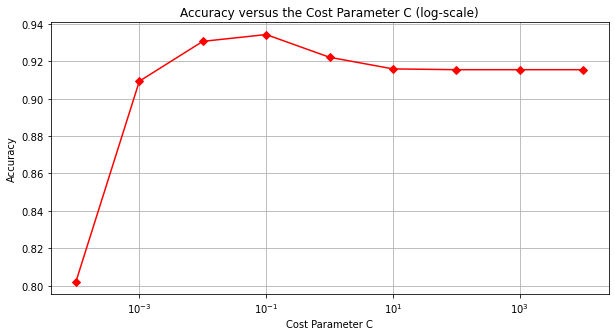

In [6]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
result = list(map(list, zip(*accuracies)))
acc, param = result

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="CV Accuracy")
# matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
# matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
# matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

Finally, we consider the best model and we fit it.

In [7]:
cv_linear_svc = SVC(kernel='linear', C=best_c)

start_train = time.time()
cv_linear_svc.fit(X_train, y_train)
time_train = time.time() - start_train

start_test = time.time()
y_pred = cv_linear_svc.predict(X_test)
time_test = time.time() - start_test

score = accuracy_score(y_test, y_pred)

print('Training time: ', time_train)
print('Test time: ', time_test)
print('Test accuracy = ', score)

Training time:  158.80518341064453
Test time:  103.61833477020264
Test accuracy =  0.939


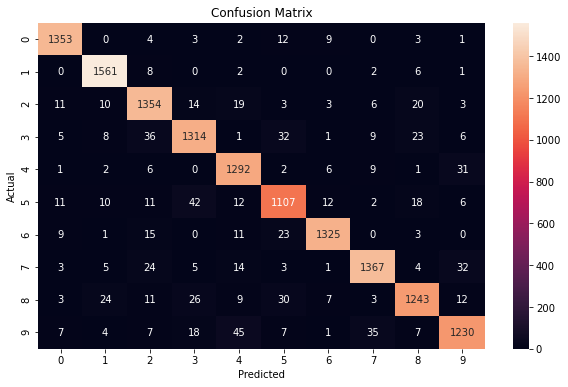

In [8]:
cm = confusion_matrix(y_test, y_pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()